In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from scipy.interpolate import make_interp_spline
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.clustering import silhouette_score

df=pd.read_csv(r'Irish_DataSet\standardData2.txt',header=None,delimiter=" ")
df.rename(columns={0: "ID", 1: "Duration", 2: "Consumption"},inplace=True)

In [2]:
# pip install -U scikit-fuzzy

In [170]:
unique_meter_ids = df['ID'].unique()
np.random.shuffle(unique_meter_ids)
meter_ids = unique_meter_ids[:50]
X = []
for meter_id in meter_ids:
    meter_data = df[df['ID'] == meter_id]['Consumption'].values
    num_values_to_keep = 8500  #170 days int(len(meter_data)*0.2)
    meter_data = meter_data[:num_values_to_keep] 
    X.append(meter_data)

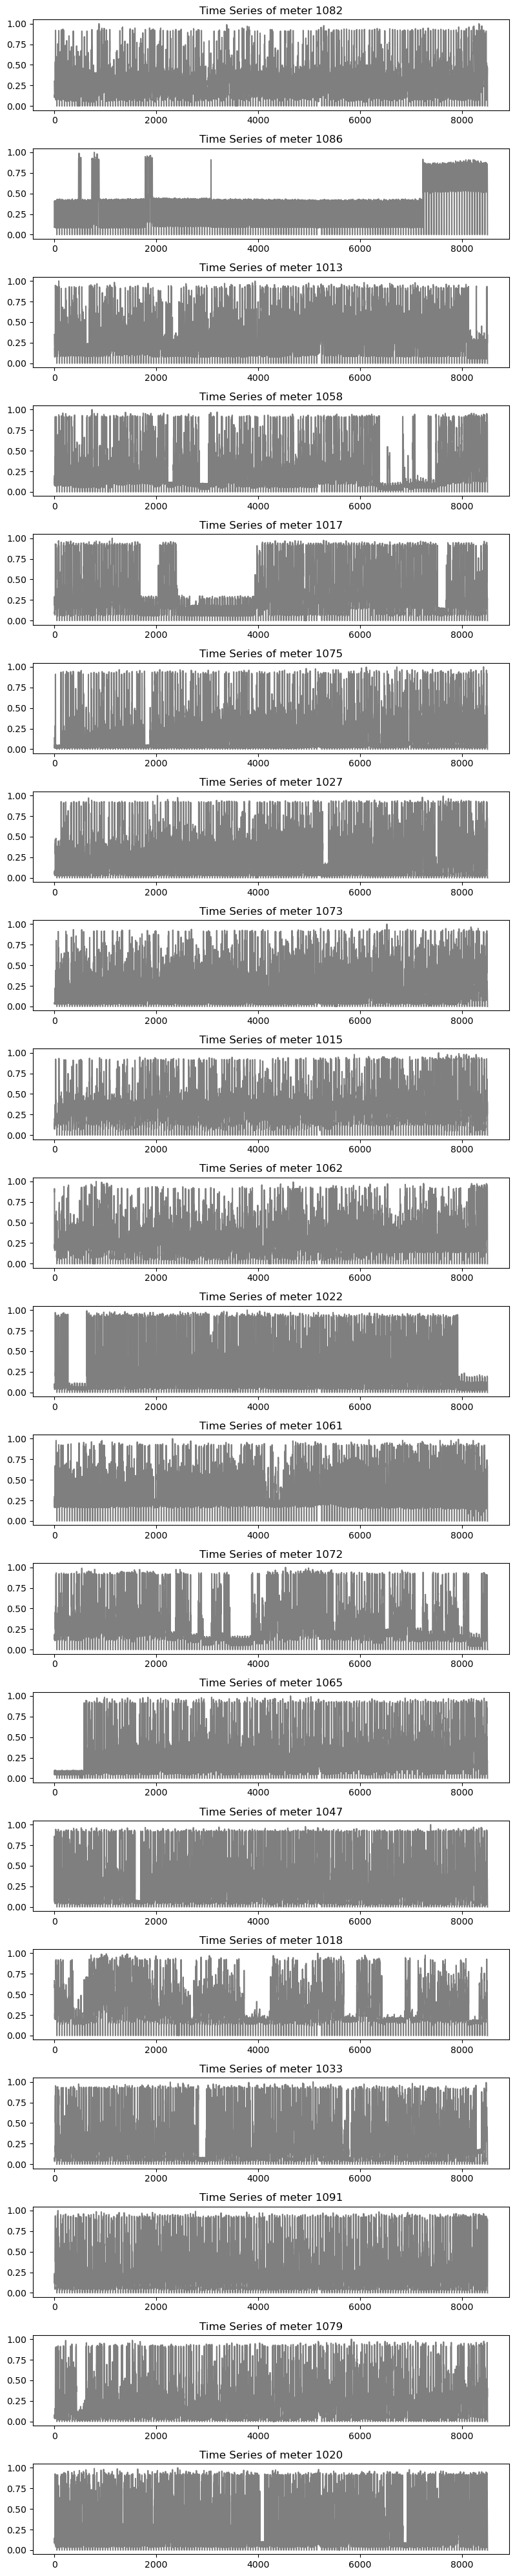

In [145]:
fig, axs = plt.subplots(len(X), 1, figsize=(8, 2 * len(X))) 

for yi in range(len(X)):
    axs[yi].plot(X[yi].ravel(), "k-", alpha=0.5)
    axs[yi].set_title(f"Time Series of meter {meter_ids[yi]}")
plt.tight_layout()
plt.show()

In [180]:
c = 2 # Number of clusters
m = 2.0  # Fuzziness coefficient
# np.random.seed(42)

X_combined = np.vstack(X)

# initial_centers = np.random.rand(c, X_combined.shape[1]) 
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(X_combined, c, m, error=0.001, maxiter=10000, init= None)

cluster_memberships = np.argmax(u, axis=0)
print(set(cluster_memberships))
print(fpc)

{0, 1}
0.5501324577329605


In [165]:
# silhouette_fcm = silhouette_score(X, cluster_memberships)
# print(silhouette_fcm)

In [167]:
# clusters_to_plot = [2,6,0]  # Adjust as needed
# plt.figure(figsize=(12, 8))

# for label in clusters_to_plot:
#     cluster_data = [X[i] for i in range(len(X)) if cluster_memberships[i] == label]
#     for series in cluster_data:
#         plt.plot(series, label=f'Cluster {label}')

# plt.title("Time Series Clusters of different meters")
# plt.xlabel("Duration") 
# plt.ylabel("Consumption")  
# plt.legend()
# plt.show()

In [81]:
# # Select the cluster label you want to visualize
# cluster_to_plot = 2  # Adjust this to the desired cluster label

# # Select two meters from the cluster
# meters_to_plot = []
# for i, label in enumerate(cluster_memberships):
#     if label == cluster_to_plot and len(meters_to_plot) < 2:
#         meters_to_plot.append(i)

# # Create a plot for the selected meters
# plt.figure(figsize=(12, 8))

# for meter_index in meters_to_plot:
#     plt.plot(X[meter_index], label=f'Meter {meter_ids[meter_index]}')

# plt.title(f"Time Series of any two Meters of Cluster {cluster_to_plot}")
# plt.xlabel("Duration")
# plt.ylabel("Consumption")
# plt.legend()
# plt.show()

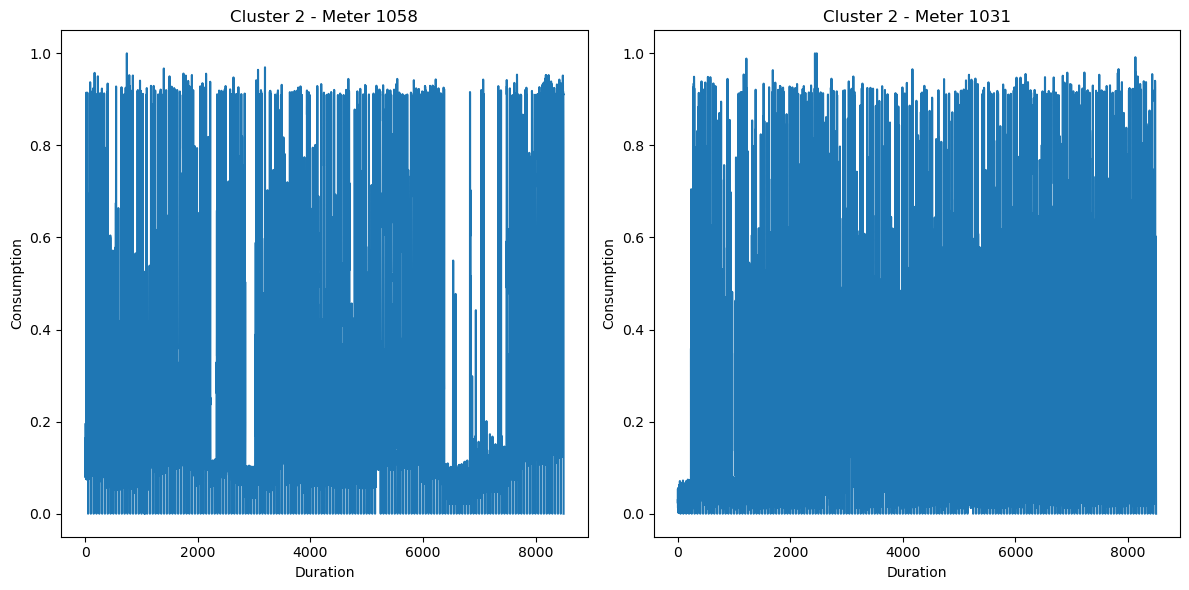

In [178]:
# Choose the cluster label you want to visualize
cluster_to_visualize = 2

# Find the indices of time series data belonging to the selected cluster
indices = [i for i in range(len(X)) if cluster_memberships[i] == cluster_to_visualize]

# Ensure there are at least two meters in the selected cluster
if len(indices) >= 2:
    plt.figure(figsize=(12, 6))

    # Visualize the first meter in the selected cluster
    plt.subplot(1, 2, 1)
    plt.plot(X[indices[0]])
    plt.title(f"Cluster {cluster_to_visualize} - Meter {meter_ids[indices[0]]}")
    plt.xlabel("Duration")
    plt.ylabel("Consumption")

    # Visualize the second meter in the selected cluster
    plt.subplot(1, 2, 2)
    plt.plot(X[indices[1]])
    plt.title(f"Cluster {cluster_to_visualize} - Meter {meter_ids[indices[1]]}")
    plt.xlabel("Duration")
    plt.ylabel("Consumption")

    plt.tight_layout()
    plt.show()
else:
    print("Not enough meters in the selected cluster to visualize.")
